# Keras, High level API for TF

* `To build a Keras Sequential model, you add layers to it in the same order that you want the computations to be undertaken by the network.`

* `After you have built your model, you compile it; this optimizes the computations that are to be undertaken, and is where you allocate the optimizer and the loss function you want your model to use.`

* `The next stage is to fit the model to the data. This is commonly known as training the model, and is where all the computations take place. It is possible to present the data to the model either in batches, or all at once.`

* `Next, you evaluate your model to establish its accuracy, loss, and other metrics. Finally, having trained your model, you can use it to make predictions on new data. So, the workflow is: build, compile, fit, evaluate, make predictions.`

* `There are two ways to create a Sequential model. Let's take a look at each of them.`

### Using Sequential model

`Firstly, you can pass a list of layer instances to the constructor, as in the following example.For now, we will just explain enough to allow you to understand what is happening here.`

`Acquire the data. MNIST is a dataset of hand-drawn numerals, each on a 28 x 28 pixel grid. Every individual data point is an unsigned 8-bit integer (uint8), as are the labels:`

In [2]:
import tensorflow as tf
# Loading dataset
mnist_data = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist_data.load_data()

C:\Users\thema\.conda\envs\myenvy\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thema\.conda\envs\myenvy\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\thema\.conda\envs\myenvy\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Defining Variables
epochs=10
batch_size = 32

In [4]:
# normalize all the data points and cast the labels to int64
train_x, test_x = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
train_y, test_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64)

* > ' Building architecture'

In [12]:
mnistmodel1 = tf.keras.models.Sequential([
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [15]:
mnistmodel1.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000024FB2A7BC70>>

In [16]:
optimiser = tf.keras.optimizers.Adam()
mnistmodel1.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

* Fitting the model

In [17]:
mnistmodel1.fit(train_x, train_y, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2187 - accuracy: 0.9353
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0957 - accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0687 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0534 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416 - accuracy: 0.9863


In [18]:
# model evaluation
mnistmodel1.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9798


[0.06947249919176102, 0.9797999858856201]

>This represents a loss of 0.09 and an accuracy of 0.9801 on the test data. 

>An accuracy of 0.98 means that out of 100 test data points, 98 were, on average, correctly identified by the model.

The second way to create a Sequential model
The alternative to passing a list of layers to the Sequential model's constructor is to use the add method, as follows, for the same architecture:



#### Building the Architecture & Compiling

In [21]:
mnistmodel2 = tf.keras.models.Sequential();
mnistmodel2.add(tf.keras.layers.Flatten())
mnistmodel2.add(tf.keras.layers.Dense(512, activation='relu'))
mnistmodel2.add(tf.keras.layers.Dropout(0.2))
mnistmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
mnistmodel2.compile (optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [22]:
# Fitting the model
mnistmodel2.fit(train_x, train_y, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2460 - accuracy: 0.9297
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1040 - accuracy: 0.9684
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0743 - accuracy: 0.9772
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0542 - accuracy: 0.9834
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0430 - accuracy: 0.9866


In [23]:
# Evaluation
mnistmodel2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.9817


[0.05818541720509529, 0.9817000031471252]

### Keras functional API

`The functional API lets you build much more complex architectures than the simple linear stack of Sequential models we have seen previously. It also supports more advanced models. These models include multi-input and multi-output models, models with shared layers, and models with residual connections.`

In [24]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0
epochs=10


In [25]:
# Building the architecture
input_ = tf.keras.layers.Input(shape=(28,28), name="input_layer") # Returns a 'placeholder' tensor
flatten = tf.keras.layers.Flatten(name="flattenLayer")(input_)
hidden_1 = tf.keras.layers.Dense(512, activation='relu',name='hiddenLayer_01')(flatten)
hidden_2 = tf.keras.layers.Dense(256, activation='relu', name="hiddenLayer_02")(hidden_1)
concat = tf.keras.layers.Concatenate()([flatten, hidden_2])
predictions = tf.keras.layers.Dense(10,activation=tf.nn.softmax, name='predictionLayer')(concat)
mnistmodel3 = tf.keras.Model(inputs=[input_], outputs=predictions)

In [26]:
mnistmodel3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flattenLayer (Flatten)          (None, 784)          0           input_layer[0][0]                
__________________________________________________________________________________________________
hiddenLayer_01 (Dense)          (None, 512)          401920      flattenLayer[0][0]               
__________________________________________________________________________________________________
hiddenLayer_02 (Dense)          (None, 256)          131328      hiddenLayer_01[0][0]             
______________________________________________________________________________________________

In [27]:
# Compile and fit
optimiser = tf.keras.optimizers.Adam()

tensorboard_cb = tf.keras.callbacks.TensorBoard("./log_dir/mnistmodel3")

mnistmodel3.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
mnistmodel3.fit(train_x, train_y, batch_size=32, epochs=epochs, callbacks=[tensorboard_cb])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1941 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0794 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0561 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0317 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0278 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0222 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [28]:
# Evaluation
mnistmodel3.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9813


[0.09350815415382385, 0.9812999963760376]

In [29]:
%load_ext tensorboard
%tensorboard --logdir ./log_dir/mnistmodel3

### Subclassing the Keras Model class

In [30]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0
epochs=10


#### Building the subclass architecture
Used to gain more control

In [32]:
class SubClassingModel(tf.keras.Model):
    def __init__(self, ACTIVATION="relu", **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.hidden_1 = tf.keras.layers.Dense(512, activation=ACTIVATION)
        self.hidden_2 = tf.keras.layers.Dense(256, activation=ACTIVATION)
        self.concat = tf.keras.layers.Concatenate()
        self.predictions = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    def call(self, input_):
        flatten = self.flatten(input_)
        hidden_1 = self.hidden_1(flatten)
        hidden_2 = self.hidden_2(hidden_1)
        concat = self.concat([flatten, hidden_2])
        predictions = self.predictions(concat)
        return predictions

In [33]:
mnistmodel4 = SubClassingModel()

In [34]:
# mnistmodel4.summary() ## Observe

In [35]:
# Compile and fit
optimiser = tf.keras.optimizers.Adam()

tensorboard_cb = tf.keras.callbacks.TensorBoard("./log_dir/SubClassingModel")

mnistmodel4.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
mnistmodel4.fit(train_x, train_y, batch_size=32, epochs=epochs, callbacks=[tensorboard_cb])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1939 - accuracy: 0.9411
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0791 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0545 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0232 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

In [36]:
mnistmodel4.summary() ## Observe

Model: "sub_classing_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  401920    
_________________________________________________________________
dense_9 (Dense)              multiple                  131328    
_________________________________________________________________
concatenate_1 (Concatenate)  multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  10410     
Total params: 543,658
Trainable params: 543,658
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Evaluate
mnistmodel4.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9808: 0s - loss: 0.1228 


[0.08955765515565872, 0.9807999730110168]

In [38]:
%load_ext tensorboard
%tensorboard --logdir ./log_dir/SubClassingModel

# graph visualisation will be failed as graphs is not generated because we are using subclassing

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#### Still you can create graphs by following tweak -

In [39]:
class SubClassingModel2(tf.keras.Model):
    def __init__(self, ACTIVATION="relu", dim=None, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        self.flatten = tf.keras.layers.Flatten()
        self.hidden_1 = tf.keras.layers.Dense(512, activation=ACTIVATION)
        self.hidden_2 = tf.keras.layers.Dense(256, activation=ACTIVATION)
        self.concat = tf.keras.layers.Concatenate()
        self.predictions = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    def call(self, input_):
        flatten = self.flatten(input_)
        hidden_1 = self.hidden_1(flatten)
        hidden_2 = self.hidden_2(hidden_1)
        concat = self.concat([flatten, hidden_2])
        predictions = self.predictions(concat)
        return predictions


    def build_graph(self): ### <<<<<<<< minor tweaking can return graph 
        x = tf.keras.layers.Input(shape=(28,28), name="input_layer")
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

model = SubClassingModel2(dim=(28,28))
model.build_graph().summary() # observe the summary now and compare it from previous model

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 784)          0           input_layer[0][0]                
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 512)          401920      flatten_5[0][0]                  
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 256)          131328      dense_11[0][0]                   
____________________________________________________________________________________________

In [40]:
optimiser = tf.keras.optimizers.Adam()

tensorboard_cb = tf.keras.callbacks.TensorBoard("./log_dir/model2")

model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=epochs, callbacks=[tensorboard_cb])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1937 - accuracy: 0.9416
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0779 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0528 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0423 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0323 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0273 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0241 - accuracy: 0.9918 0s - loss: 0.023
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 

In [41]:
%load_ext tensorboard
%tensorboard --logdir ./log_dir/model2

# now graph can be seen

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Simple Linear regression example - 

$f(x) = W \cdot x + b$

#### Create synthetic data points

In [46]:
import tensorflow as tf

# Ground truth or actual Weight and bias
TRUE_W = 3.0
TRUE_b = 2.0

# total data points
NUM_EXAMPLES = 100

# A vector of random x values of shape NUM_EXAMPLES
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_b + noise

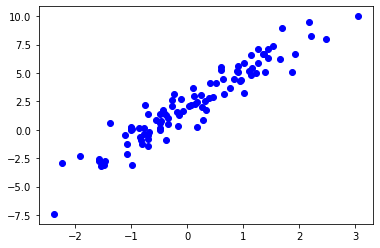

In [47]:
# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

# Defining the model

In [58]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # It can be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:\n", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables:
 (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


### define a MSE loss function


In [59]:
# This computes a single loss value for an entire batch
def MSE_loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

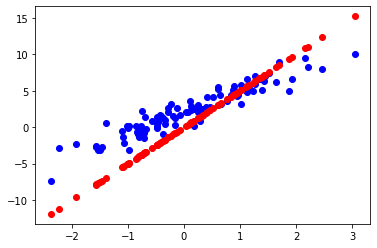

Current loss: 9.942327


In [60]:
# loss values at before training - 

plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()
initialLoss = MSE_loss(model(x), y).numpy()
print(f"Current loss: {initialLoss:1.6f}")

In [61]:
### Define our training loop

In [62]:
# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    current_loss = MSE_loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b]) 

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw) ## w_new = w_old - eta * dc_dw
  model.b.assign_sub(learning_rate * db) ## bias_new = bias_old - eta * dc_db

In [63]:
# initialize our model
model = MyModel()

# Collect the history of W-values and b-values for plotting
Ws, bs = [], []
epochs = range(10)
LEARNING_RATE=0.1

# Define a training loop
def training_loop(model, x, y, LEARNING_RATE):
  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=LEARNING_RATE)

    # Append current w and b to keep track of it
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = MSE_loss(y, model(x))

    print(f"Epoch {epoch:2d}: W={Ws[-1]:1.2f} b={bs[-1]: 1.2f}, loss={current_loss: 2.5f}")
    # print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
    #       (epoch, Ws[-1], bs[-1], ))


Initial W= 5.00 b= 0.00, loss= 9.94233
Epoch  0: W=4.54 b= 0.38, loss= 6.73584
Epoch  1: W=4.18 b= 0.69, loss= 4.69614
Epoch  2: W=3.90 b= 0.95, loss= 3.39574
Epoch  3: W=3.68 b= 1.15, loss= 2.56495
Epoch  4: W=3.50 b= 1.33, loss= 2.03317
Epoch  5: W=3.37 b= 1.47, loss= 1.69218
Epoch  6: W=3.26 b= 1.58, loss= 1.47318
Epoch  7: W=3.18 b= 1.67, loss= 1.33232
Epoch  8: W=3.11 b= 1.75, loss= 1.24160
Epoch  9: W=3.06 b= 1.81, loss= 1.18310


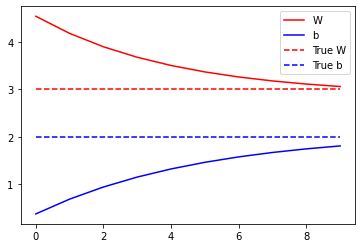

In [64]:
w = model.w.numpy()
b = model.b.numpy()
print(f"Initial W={w: 1.2f} b={b: 1.2f}, loss={initialLoss: 2.5f}")

# Do the training
training_loop(model, x, y, LEARNING_RATE)

# Plot it
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()


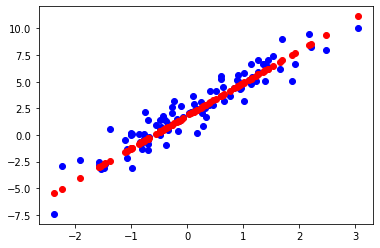

Current loss: 1.183098


In [55]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

loss_after_training = MSE_loss(model(x), y).numpy()
print(f"Current loss: {loss_after_training:1.6f}")